In [1]:
!pip install ta

In [2]:
import pandas as pd
import ta
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('GOOGL.csv', sep=',')

df = ta.utils.dropna(df)

df = ta.add_all_ta_features(
  df, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

/usr/local/lib/python3.7/dist-packages/ta/trend.py:768: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i] / self._trs[i])
/usr/local/lib/python3.7/dist-packages/ta/trend.py:772: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i] / self._trs[i])


In [4]:
df['EMA26'] = ta.trend.EMAIndicator(df['Close'], 26, True).ema_indicator()
df['EMA12'] = ta.trend.EMAIndicator(df['Close'], 12, True).ema_indicator()

df['MACD'] = ta.trend.MACD(df['Close'], 12, 26, 9).macd()
df['MACD_diff'] = ta.trend.MACD(df['Close'], 12, 26, 9).macd_diff()
df['Signal Line'] = ta.trend.MACD(df['Close'], 12, 26, 9).macd_signal()

df['ROC12'] = ta.momentum.ROCIndicator(df['Close'], 12, True).roc()

df['RSI'] = ta.momentum.RSIIndicator(df['Close'], 14, True).rsi()

df['MFI'] = ta.volume.MFIIndicator(df['High'], df['Low'], df['Close'], df['Volume'], 14, True).money_flow_index()

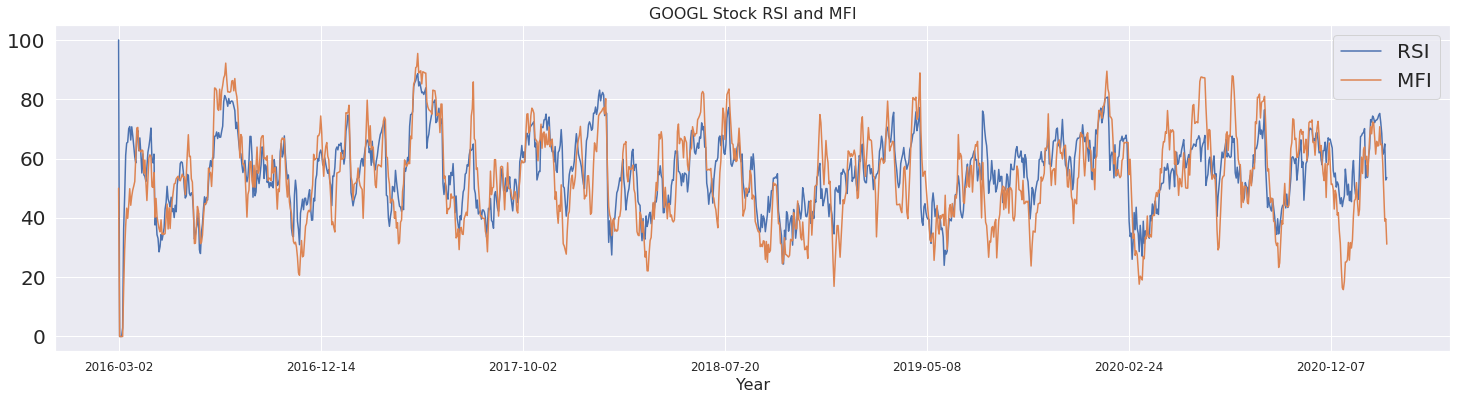

In [5]:
df.plot('Date', ['RSI', 'MFI'], figsize=(25,6))
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=12)
plt.legend(loc='best',prop={'size': 20}, markerscale=20)
plt.title("GOOGL Stock RSI and MFI", fontsize=16)
plt.xlabel('Year', fontsize=16)

plt.show()

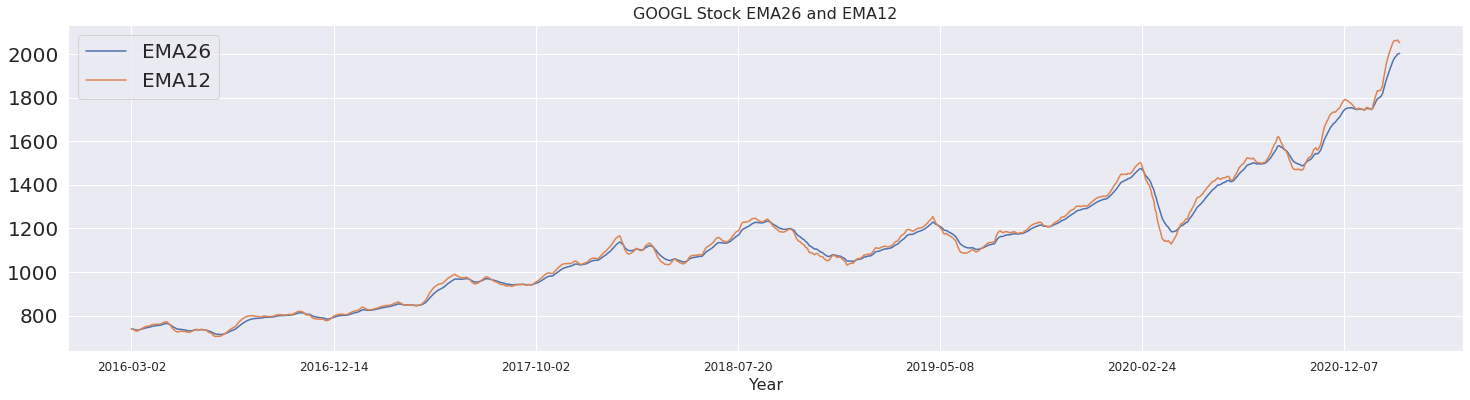

In [6]:
df.plot('Date', ['EMA26', 'EMA12'], figsize=(25,6))
df.to_csv('df2.csv')
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=12)
plt.legend(loc='best',prop={'size': 20}, markerscale=20)
plt.title("GOOGL Stock EMA26 and EMA12", fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

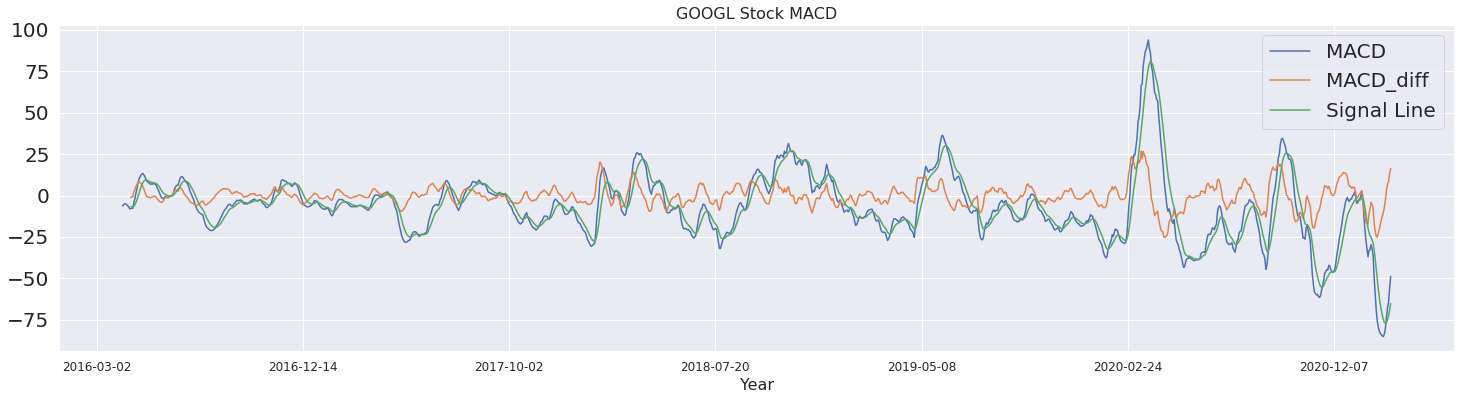

In [7]:
df.plot('Date', ['MACD', 'MACD_diff', 'Signal Line'], figsize=(25,6))
df.to_csv('df2.csv')
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=12)
plt.legend(loc='best',prop={'size': 20}, markerscale=20)
plt.title("GOOGL Stock MACD", fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()

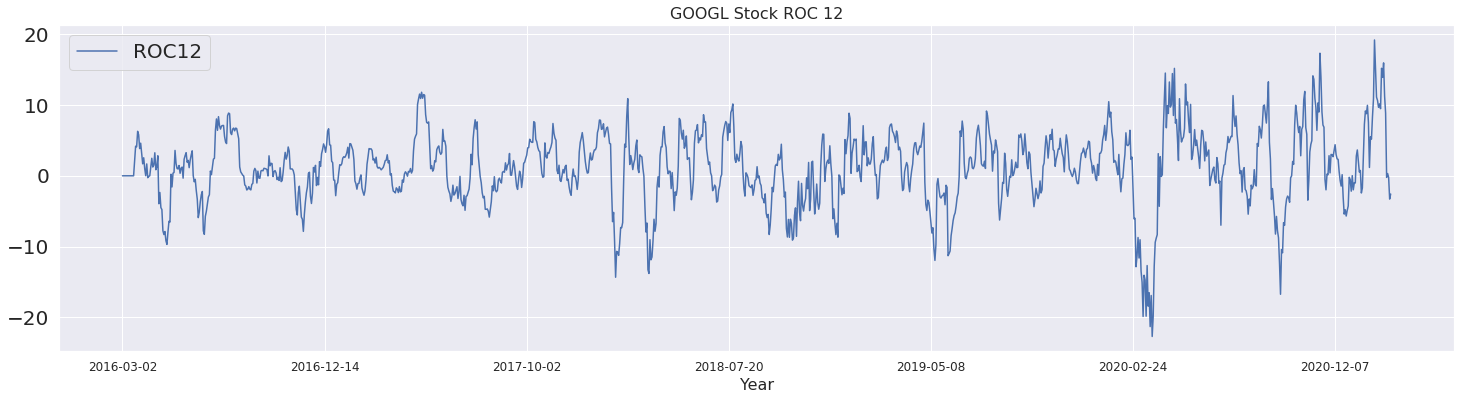

In [8]:
df.plot('Date', ['ROC12'], figsize=(25,6))
plt.tick_params(axis='y',labelsize=20)
plt.tick_params(axis='x',labelsize=12)
plt.legend(loc='best',prop={'size': 20}, markerscale=20)
plt.title("GOOGL Stock ROC 12", fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.show()